# Домашняя работа

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio

## Загрузка ЧБ изображения

In [53]:
I = imageio.imread('picture.jpg')
# img = img[:,:,0].astype(np.float32) / 255.
print(I.shape)

(850, 1332, 3)


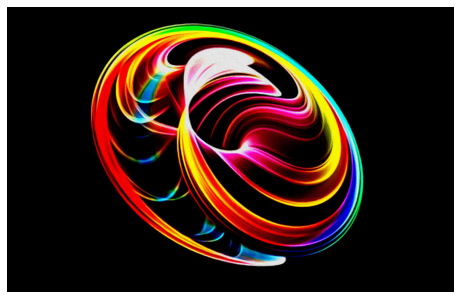

In [69]:
plt.figure(figsize=(8, 8))
plt.grid(False)
plt.axis('off')
plt.imshow(img)
plt.show()

## Оконная функция (функция фильтра)
Фильтр производит размытие (box blur)

In [67]:
x=np.ones(3)

In [68]:
x*np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

array([[-1.,  0.,  1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]])

In [80]:
def my_filter(x):
    # Box blur
    return np.sum(x*np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1]])/9)

## Оконная обработка изображения (фильтрация)

In [81]:
win_size = (3, 3) # размер окна

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = my_filter(x)

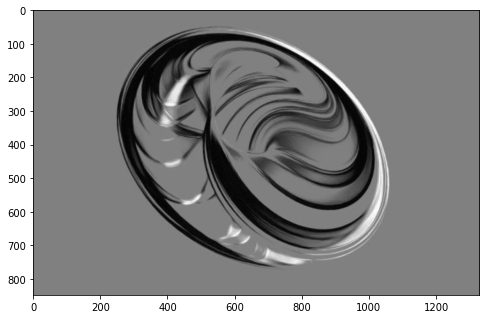

In [73]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

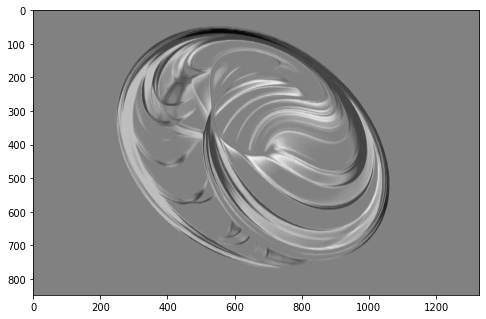

In [76]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

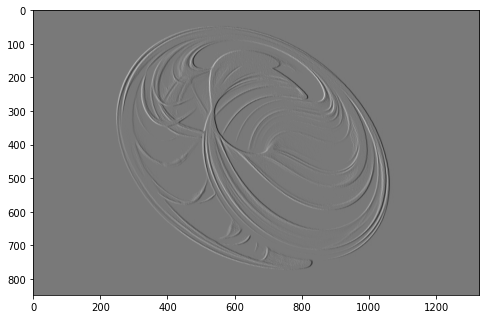

In [79]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

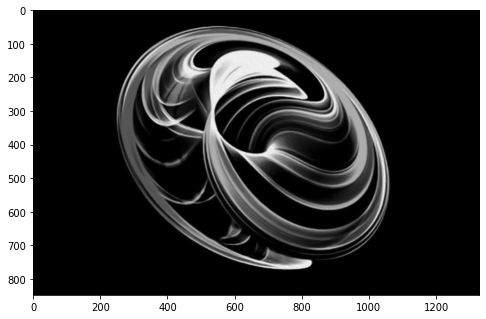

In [82]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

Спасибо Марии Корляковой за интересные ядра сверкти

In [49]:
filter = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
# Фильтры края.

#Разные фильтры.
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
#filter = np.random.randn(3,3)

# Много разных
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# зададим вес для свертки
weight  = 1

In [54]:
I_transformed = np.copy(I)
size_x = I_transformed.shape[0]
size_y = I_transformed.shape[1]

In [56]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (I[x - 1, y-1] * filter[0][0])
      convolution = convolution + (I[x, y-1] * filter[0][1])
      convolution = convolution + (I[x + 1, y-1] * filter[0][2])
      convolution = convolution + (I[x-1, y] * filter[1][0])
      convolution = convolution + (I[x, y] * filter[1][1])
      convolution = convolution + (I[x+1, y] * filter[1][2])
      convolution = convolution + (I[x-1, y+1] * filter[2][0])
      convolution = convolution + (I[x, y+1] * filter[2][1])
      convolution = convolution + (I[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
    #   if(convolution<0):
    #     convolution=0
    #   if(convolution>255):
    #     convolution=255
      I_transformed[x, y] = convolution

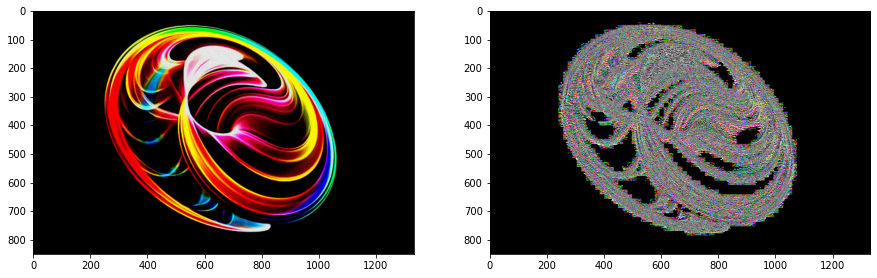

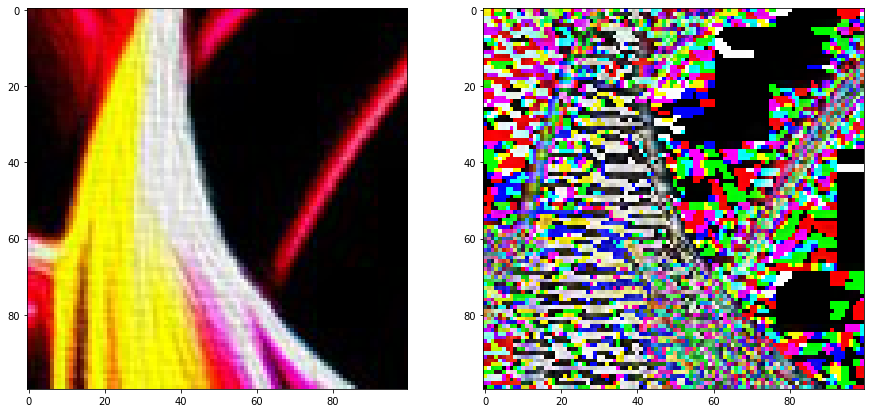

In [61]:
# Plot the image. 512 by 512
plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(I_transformed)
#plt.axis('off')
plt.show()

ymin,ymax,xmin,xmax = 300,400,500,600

plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)
plt.subplot(1,2,1)
plt.imshow(I[ymin:ymax,xmin:xmax])
plt.subplot(1,2,2)
plt.imshow(I_transformed[ymin:ymax,xmin:xmax])
#plt.axis('off')
plt.show() 